In [19]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [20]:
# Step 1: Connect to SQLite database file
db_path = "sales_data.db"
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

In [21]:
# Step 2: Create table and insert sample data (only if the table doesn't exist)
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY,
    product TEXT,
    quantity INTEGER,
    price REAL
);
''')

In [22]:
#  add data if table is empty
cursor.execute("SELECT COUNT(*) FROM sales;")
if cursor.fetchone()[0] == 0:
    sample_data = [
        ('Apple', 10, 0.50),
        ('Banana', 8, 0.30),
        ('Apple', 5, 0.50),
        ('Orange', 12, 0.60),
        ('Banana', 4, 0.30),
        ('Orange', 7, 0.60)
    ]


In [23]:
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?);", sample_data)
conn.commit()

In [25]:
# Step 3: Run SQL query to get summary
query = '''
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product;
'''

In [26]:
df = pd.read_sql_query(query, conn)

In [29]:
# Step 4: Display results
print("=== Sales Summary ===")
print(df)





=== Sales Summary ===
  product  total_qty  revenue
0   Apple         30     15.0
1  Banana         24      7.2
2  Orange         38     22.8


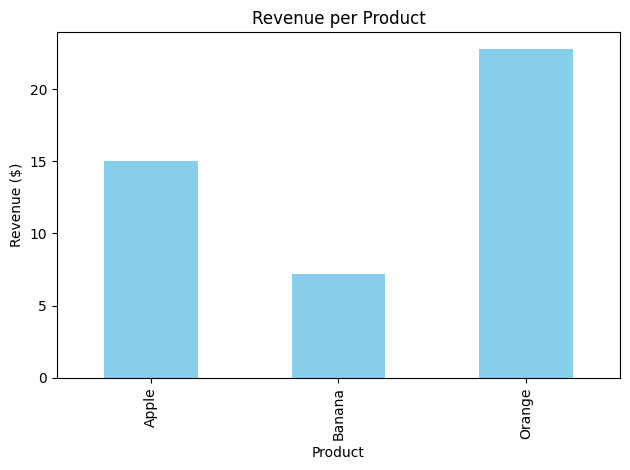

In [31]:
# Step 5: Plot bar chart of revenue per product
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title("Revenue per Product")
plt.xlabel("Product")
plt.ylabel("Revenue ($)")
plt.tight_layout()
plt.savefig("sales_chart.png")  # Optional: Save the chart
plt.show()

In [32]:
# Step 6: Close database connection
conn.close()